# L19 Bootstrap

Key concepts: Parametric bootstrap, non-parametric bootstrap on a random variable. Non-parametric bootstrap on regression.

In [14]:
# plot settings
options(repr.plot.width=4, repr.plot.height=3)

Example: Use maximum likelihood to estimate the parameter of a Poisson distribution.

From simulated data: To estimate the distribution of the estimator, we could repeat the simulation many times.

In [26]:
NObservations <- 20
observations = rexp(NObservations,rate=2.63)

rate_hat <- 1/mean(observations)

rate_hat

[1] 3.530656

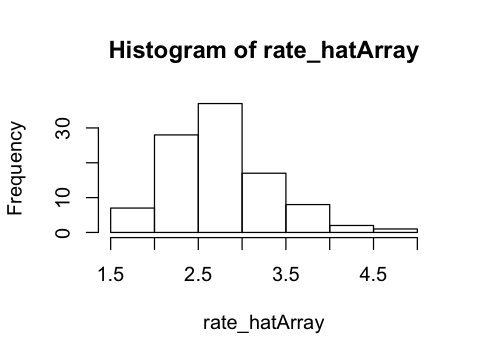

In [27]:
NResimulate <- 100

# initialize an array to store all the estimates
rate_hatArray <-0

for (iSimulation in 1:NResimulate){
    
    NObservations <- 20
    observations = rexp(NObservations,rate=2.63) # Note these simulations use the true value

    rate_hat <- 1/mean(observations)

    rate_hatArray[iSimulation] = rate_hat
    
}

hist(rate_hatArray)

In [28]:
sd(rate_hatArray)

quantile(rate_hatArray)

quantile(rate_hatArray, probs = c(0.05, 0.95))

[1] 0.5870309

0%      25%      50%      75%     100% 
1.625678 2.378683 2.704352 3.060738 4.739701

5%      95% 
1.931580 3.849745

If we have high confidence in the model and the estimate of the parameter, we can simulate data and repeat the estimation process. This is called __parametric bootstrap__. Note this requires the ability to forward-simulate the probability model.

---

In reality, we might not have high confidence in the model, or it might be difficult or impossible to forward-simulate the model.

In [48]:
NObservations <- 20
observations <- rexp(NObservations,rate=2.63)

observations

[1] 0.002725554 0.143360361 0.133128186 0.704925902 0.079497624 0.251246016
 [7] 0.215999685 0.742385247 0.223548203 0.049611273 0.246881280 0.317791710
[13] 0.005058970 0.651046835 1.332596284 0.501785117 0.121538826 0.394435336
[19] 0.039218834 0.157859074

Alternatively, we can resample with replacement from the data, and repeat the estimation process. This is called __non-parametric bootstrap__. Note this does not require the ability to forward-simulate the model.

[1] 0.7952821

0%      25%      50%      75%     100% 
1.719421 2.768710 3.178091 3.716189 7.024130

5%      95% 
2.271357 4.878273

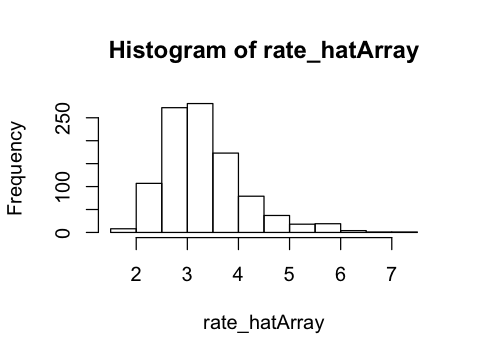

In [53]:
NResample <- 1000

# initialize an array to store all the estimates
rate_hatArray <-0

for (iResample in 1:NResample){

    NObservations <- 20
    resampledObservations <- sample(observations, size=NObservations, replace = TRUE)
   
    rate_hat <- 1/mean(resampledObservations)
    
    rate_hatArray[iResample] = rate_hat
    
}


hist(rate_hatArray)

sd(rate_hatArray)

quantile(rate_hatArray)

quantile(rate_hatArray, probs = c(0.05, 0.95))

---
Non-parametric bootstrap is extremely general. For any inference algorithm, if a resampling of the data can be made, bootstrap can be used.

Let's use it on linear regression.

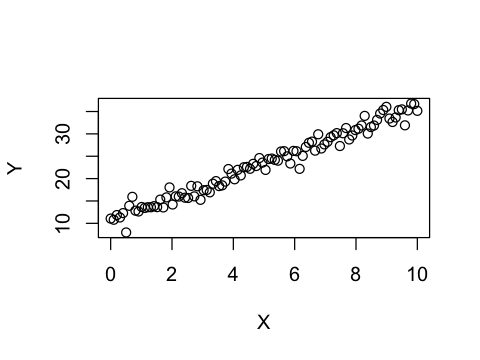

In [64]:
# Simulate some linear data with noise
N <- 100
beta0 <- 10.5
beta1 <- 2.6
sigma <- 1.4

X <- seq(0,10,length=N)
eps <- rnorm(N,0,sigma)

Y <- beta0 + beta1*X +eps

plot(X,Y)

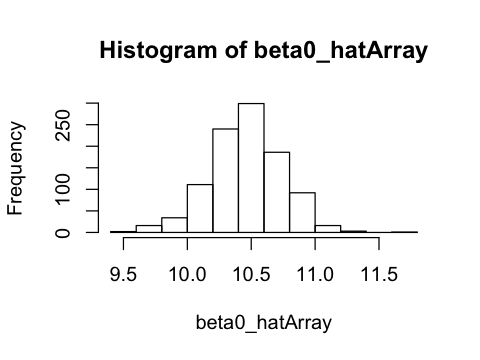

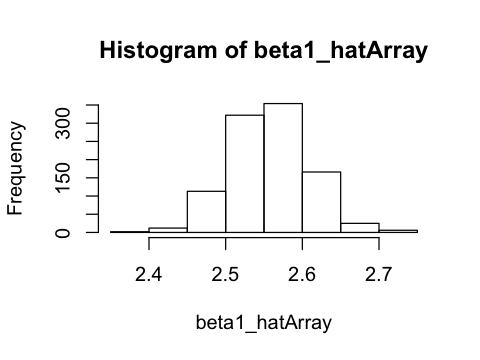

In [69]:
NResample <- 1000

# initialize an array to store all the estimates
beta0_hatArray <-0
beta1_hatArray <-0


for (iResample in 1:NResample){

    thisSampleRows <- sample(N, replace = TRUE) # which rows of X and Y to take in this resample
    Y_thisSample = Y[thisSampleRows]
    X_thisSample = X[thisSampleRows]
    
    thisFit = lm(Y_thisSample~X_thisSample)
    
    beta0_hatArray[iResample] = coef(thisFit)[1]
    beta1_hatArray[iResample] = coef(thisFit)[2]
    
}


hist(beta0_hatArray)
hist(beta1_hatArray)
